<a href="https://colab.research.google.com/github/nishabhati12/youtube-comments-spam-classifier/blob/master/Hatespeechdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Packages**

In [ ]:
import pandas as pd
import numpy as np
import string
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. model_selection import train_test_split
from sklearn. tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

**Importing Libraries**

In [ ]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk. corpus import stopwords
stopword=set(stopwords.words('english'))
stemmer = nltk. SnowballStemmer('english')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
data = pd. read_csv("labeled_data.csv")
#To preview the data
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


**Preprocessing the data**

In [ ]:
data["labels"] = data["class"]. map({0: "Hate Speech", 1: "Offensive Speech", 2: "No Hate and Offensive Speech"})
data = data[["tweet", "labels"]]
data.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive Speech
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Speech
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Speech
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Speech
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Speech


In [ ]:
data[data['labels']=='Hate Speech']

,tweet,labels
85,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...",Hate Speech
89,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",Hate Speech
110,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",Hate Speech
184,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",Hate Speech
202,"""@NoChillPaz: ""At least I'm not a nigger"" http...",Hate Speech
...,...,...
24576,this guy is the biggest faggot omfg,Hate Speech
24685,which one of these names is more offensive kik...,Hate Speech
24751,you a pussy ass nigga and I know it nigga.,Hate Speech
24776,you're all niggers,Hate Speech


In [ ]:
data.iloc[24776]

tweet     you're all niggers
labels           Hate Speech
Name: 24776, dtype: object

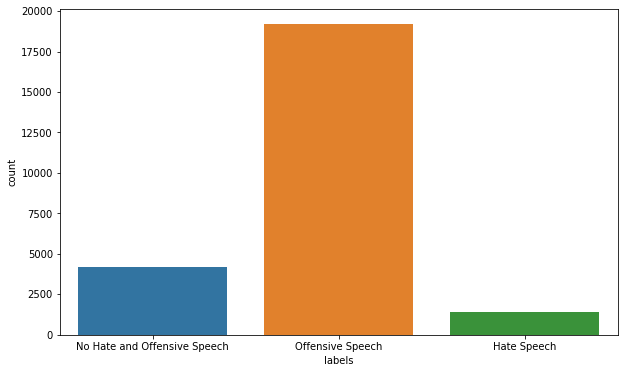

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x='labels',data=data)

In [ ]:
data['labels'].value_counts(normalize=True)*100

Offensive Speech                77.432111
No Hate and Offensive Speech    16.797805
Hate Speech                      5.770084
Name: labels, dtype: float64

In [ ]:
type(data["tweet"])

pandas.core.series.Series

In [ ]:
'''def clean(text):
  text=str(text).lower()
  text=re.sub('[.?]', "", text)
  text=re.sub('https?:/^S+|www.\S+',"",text)
  text=re.sub('<.?>+', "", text)
  text=re.sub('[%s]' % re.escape(string.punctuation), "", text)
  text=re.sub('\n', "",text)
  text=re.sub('\w\d\w', "",text)
  text=[word for word in text.split(' ') if word not in stopword]
  text=" ".join(text)
  text=[lemmatizer.lemmatize(word) for word in stopword]
  text=" ".join(text)
  return text
data["tweet"]=data["tweet"].apply(clean)'''

'def clean(text):\n  text=str(text).lower()\n  text=re.sub(\'[.?]\', "", text)\n  text=re.sub(\'https?:/^S+|www.\\S+\',"",text)\n  text=re.sub(\'<.?>+\', "", text)\n  text=re.sub(\'[%s]\' % re.escape(string.punctuation), "", text)\n  text=re.sub(\'\n\', "",text)\n  text=re.sub(\'\\w\\d\\w\', "",text)\n  text=[word for word in text.split(\' \') if word not in stopword]\n  text=" ".join(text)\n  text=[lemmatizer.lemmatize(word) for word in stopword]\n  text=" ".join(text)\n  return text\ndata["tweet"]=data["tweet"].apply(clean)'

In [ ]:
wd = WordNetLemmatizer()
corpus=[]
for i in range(0,len(data)):
  tweet = re.sub('[^a-zA-Z]',' ',data['tweet'].iloc[i])
  tweet = tweet.lower()
  tweet = tweet.split()
  tweet = [wd.lemmatize(word) for word in tweet if not word in stopwords.words('english')]
  tweet = ' '.join(tweet)
  corpus.append(tweet)

In [ ]:
corpus

['rt mayasolovely woman complain cleaning house amp man always take trash',
 'rt mleew boy dat cold tyga dwn bad cuffin dat hoe st place',
 'rt urkindofbrand dawg rt sbaby life ever fuck bitch start cry confused shit',
 'rt c g anderson viva based look like tranny',
 'rt shenikaroberts shit hear might true might faker bitch told ya',
 'madison x shit blow claim faithful somebody still fucking hoe',
 'brighterdays sit hate another bitch got much shit going',
 'selfiequeenbri cause tired big bitch coming u skinny girl',
 'amp might get ya bitch back amp thats',
 'rhythmixx hobby include fighting mariam bitch',
 'keeks bitch curve everyone lol walked conversation like smh',
 'murda gang bitch gang land',
 'hoe smoke loser yea go ig',
 'bad bitch thing like',
 'bitch get',
 'bitch nigga miss',
 'bitch plz whatever',
 'bitch love',
 'bitch get cut everyday b',
 'black bottle amp bad bitch',
 'broke bitch cant tell nothing',
 'cancel bitch like nino',
 'cant see hoe wont change',
 'fuck bitc

In [ ]:
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
Y = data['labels'].iloc[:].values
Y

array(['No Hate and Offensive Speech', 'Offensive Speech',
       'Offensive Speech', ..., 'Offensive Speech', 'Offensive Speech',
       'No Hate and Offensive Speech'], dtype=object)

**Splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 101)

In [ ]:
model = MultinomialNB()
model.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

In [ ]:
pred = model.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:  %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
print(cm)
print(classification_report(Y_test, pred))
#plot_confusion_matrix(cm, classes=['No Hate and Offensive Speech', 'Offensive Speech', 'Hate Speech'])

accuracy:  0.880
[[  68   34  190]
 [  23  654  143]
 [ 108   98 3639]]
                              precision    recall  f1-score   support

                 Hate Speech       0.34      0.23      0.28       292
No Hate and Offensive Speech       0.83      0.80      0.81       820
            Offensive Speech       0.92      0.95      0.93      3845

                    accuracy                           0.88      4957
                   macro avg       0.70      0.66      0.67      4957
                weighted avg       0.87      0.88      0.87      4957



**Evaluating the results**

In [ ]:
#Predicting the outcome
inp="You are too bad and I dont like your attitude"
inp=cv.transform([inp]).toarray()
print(model.predict(inp))

['Offensive Speech']


In [ ]:
inp = "It is really awesome"
inp = cv.transform([inp]).toarray()
print(model.predict(inp))

['No Hate and Offensive Speech']
